# The monty hall problem


![monty_hall1](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/250px-Monty_open_door.svg.png)



The monty hall problem er et kjent matematisk problem som bygger på det amerikanske TV programmet "lets make a deal", som ledes av Monty Hall.

Problemet går ut på at man er på et "gameshow" hvor man blir møtt av tre dører, med løfte om at det befinner seg en bil bak en av dørene, mens de to resterende dørene ikke inneholder noen premie.

Spillet:
1. Deltageren får beskjed om å velge seg en dør uten å åpne den
2. Programlederen åpner og viser en av de tomme dørene
3. Programlederen spør om deltageren vil beholde sin dør eller bytte til den gjenværende døren


Løsninen på dette er da at sannsynligheten for å velge riktig dør i utgangspunktet er 1/3, mens sannsynligheten for å velge feil er 2/3. Når programlederen utelukker en dør av feilgruppen blir den gjenværende sannsynligheten konsentrert til den siste døra. Det er da dobbelt så stor sjanse for å vinne hvis man bytter dør.

![test](https://res.cloudinary.com/practicaldev/image/fetch/s--VuL2LNu7--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://kalebujordan.com/wp-content/uploads/2020/06/352px-Monty_closed_doors.svg.png)

For å teste dette i praksis har jeg nedenfor satt opp et mindre program som spiller n antall spill og plotter resultatene for henholdsvis å beholde eller bytte dør.










kilde: https://no.wikipedia.org/wiki/Monty_Hall-problemet


In [107]:

import random as rd
import matplotlib.pyplot as plt

# function for a game in which the player keeps their original door
def  keepdoor():
    """One round of the monty hall problem, in which the player keeps their door,
       returns: 0 or 1 depending on won or lost game."""

    # Create list of three doors, fill with 'empty'
    doors=['empty','empty','empty']
   
    # Replace a random door with prize, and save the location of the prize as a variable
    prize = rd.randint(1,3)
    doors[prize-1]='prize'

    # Choose a door
    choice_p = rd.randint(1,3)-1

    # create a list of doors without prizes        
    cnt=0
    doors_noprize=[]
    for item in doors:
        if item != 'prize':
            doors_noprize.append(cnt)
        cnt+=1

    # Host opens a random door, not containing the prize
    if choice_p in doors_noprize:
        doors_noprize.remove(choice_p)
    choice_h = rd.choice(doors_noprize)

    # keep door:
    if doors[choice_p] == 'prize':
        #print('congrats!')
        cnt=1
        return cnt
    else:
        #print('you lost...')
        cnt=0
        return cnt


# function for a game in which the player switches from their original door
def switchdoor():
    """One round of the monty hall problem, in which the player switches door,
       returns: 0 or 1 depending on won or lost game."""
    
    doors=['empty','empty','empty']
    # Replace a random door with prize, and save the location of the prize as a variable
    prize = rd.randint(1,3)-1
    #print(prize)
    doors[prize]='prize'
    #print(doors)
    #print(f"prize is behind door: {prize}")
    choices = [0,1,2]

    # create a list of doors without prizes        
    cnt=0
    doors_noprize=[]
    for item in doors:
        if item != 'prize':
            doors_noprize.append(cnt)
        cnt+=1

    # Player chooses a door, choice_p
    choice_p = rd.randint(1,3)-1

    # Host opens a random door, choice_h, not containing the prize
    if choice_p in doors_noprize:
        doors_noprize.remove(choice_p)
    choice_h = rd.choice(doors_noprize)
    
    # the choices of player and host is removed from the available doors
    choices.remove(choice_p)
    choices.remove(choice_h)
    
    # the result of the remaining door is evaluated
    if doors[choices[0]] == 'prize':
        #print('you won')
        return 1
    else:
        #print('you lost')
        return 0

    # choose the remaining door:
    for choice in choices:
        if choice != choice_p and choice!=choice_h:
            final_choice = choice
            #print(f"player switches door to: {final_choice}")

    if doors[final_choice] == 'prize':
        #print('congrats!')
        cnt=1
        return cnt
    else:
        #print('you lost...')
        cnt=0
        return cnt


    
def average_results(data):
    cnt=1
    total=0
    average = []
    for item in data:
        total+=data[cnt-1]
        try:
            average.append(total/cnt)
        except:
            pass
        cnt+=1
    return average
    
 
if __name__ =="__main__":
    results_switch=[]
    results_keep=[]
    for n in range(2000):
        results_switch.append(switchdoor())
        results_keep.append(keepdoor())
    print(sum(results_switch)/len(results_switch))
    average_switch=average_results(results_switch)
    average_keep=average_results(results_keep)


0.652


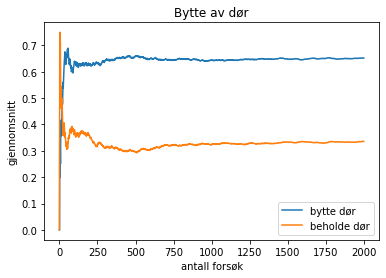

In [108]:
fig, ax = plt.subplots()
ax.plot(average_switch,label="bytte dør")
ax.set(xlabel='antall forsøk',ylabel='gjennomsnitt',title='Bytte av dør')
ax.plot(average_keep,label="beholde dør")
ax.legend(loc="lower right")


Figuren viser et gjennomsnitt av antall spill vunnet ut fra antall forsøk, hvert spill bruker tilfeldige verdier for valgene gjort av programlederen og spilleren.